In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

Processing genre: blues
Processing genre: classical
Processing genre: country
Processing genre: disco
Processing genre: hiphop
Processing genre: jazz


/tmp/ipykernel_32/3010267294.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(file_path, res_type="kaiser_fast")
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav: 
Processing genre: metal
Processing genre: pop
Processing genre: reggae
Processing genre: rock
Accuracy: 0.53


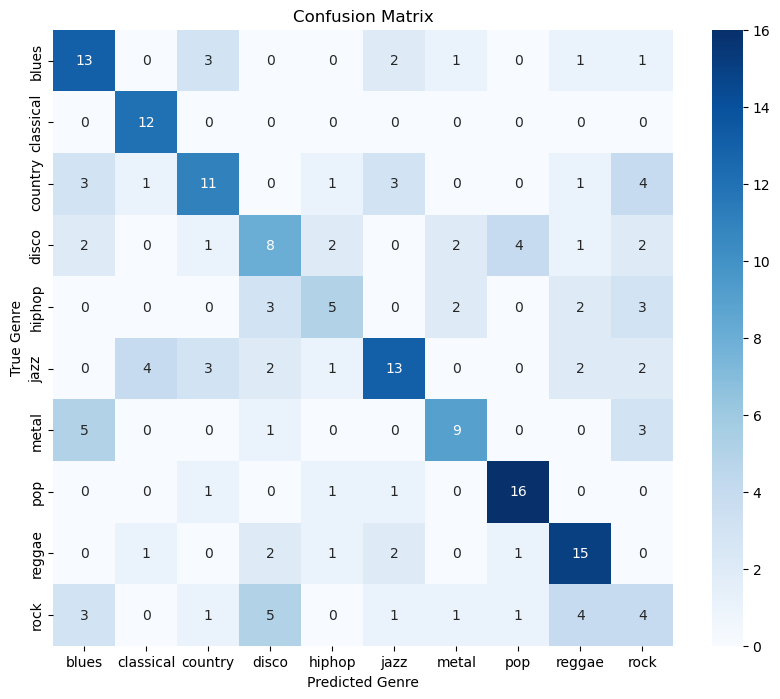

In [6]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load GTZAN dataset
dataset_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
num_samples = 100

X = []
y = []

for i, genre in enumerate(genres):
    print(f"Processing genre: {genre}")
    genre_path = os.path.join(dataset_path, genre)
    for j, song in enumerate(os.listdir(genre_path)):
        if j == num_samples:
            break
        file_path = os.path.join(genre_path, song)
        try:
            audio_data, sr = librosa.load(file_path, res_type="kaiser_fast")
            audio_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
            audio_features = np.mean(audio_features, axis=1)
            X.append(audio_features)
            y.append(i)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

X = np.array(X)
y = np.array(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common)
        return y_pred


# Train KNN classifier
k = 5
knn = KNN(k)
knn.fit(X_train, y_train)

# Evaluate model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set the genre labels
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.title('Confusion Matrix')
plt.show()


In [7]:
import os
import librosa
import numpy as np

# Load audio file
audio_file = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00025.wav"
audio_data, sr = librosa.load(audio_file, res_type="kaiser_fast", sr=None)

# Extract MFCC features
audio_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
audio_features = np.mean(audio_features, axis=1)
audio_features = audio_features.reshape(1, -1)

# Make prediction using KNN classifier
knn_pred = knn.predict(audio_features)
predicted_genre = genre_mapping[knn_pred[0]]

print(f"Predicted genre: {predicted_genre}")


Predicted genre: hiphop
